In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Assuming a regression model
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = pd.read_csv('merged_data.csv')

# Verify and print all column names to confirm the disease and smoking columns
print(data.columns)

# Identify all columns that are disease metrics (assuming they start with 'Disease')
disease_columns = [col for col in data.columns if col.startswith('Disease')]

# Calculate the Health Index
weighting_factor_smoking = 1.5  # Smoking might be more impactful, this is arbitrary and for demonstration
number_of_factors = len(disease_columns) + 1  # Number of disease metrics plus one for smoking

# Adjusting the Health Index to normalize the smoking impact
data['Health_Index'] = (data[disease_columns].sum(axis=1) + (data['Smoking_2021'] + data['Smoking_1990']) / 2) / (len(disease_columns) + 1)


# Prepare features and target variable
X = data[disease_columns + ['Smoking_2021']]  # features include all disease columns and smoking
y = data['Health_Index']  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')


Index(['Country', '1990', '2021.0', 'Absolute Change', 'Relative Change',
       '1990.1', '2021.0.1', 'Absolute Change.1', 'Relative Change.1',
       '1990.2', '2021.0.2', 'Absolute Change.2', 'Relative Change.2',
       'Smoking_1990', 'Smoking_2021', 'Change', 'Percent_Change', 'Disease1',
       'Disease2', 'Disease3', 'Disease4', 'Disease5', 'Disease6', 'Disease7',
       'Disease8', 'Disease9', 'Disease10', 'Disease11', 'Disease12',
       'Disease13', 'Disease14', 'Disease15', 'Disease16', 'Disease17',
       'Disease18', 'Disease19', 'Disease20', 'Disease21', 'Disease22',
       'Disease23', 'Disease24', 'Disease25', 'Disease26', 'Disease27',
       'Disease28', 'Metric1', 'Metric2', 'Population'],
      dtype='object')
Mean Squared Error: 43925649.180680305


In [15]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the model with scaled data
model.fit(X_train_scaled, y_train)
predictions_scaled = model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, predictions_scaled)

print(f'Scaled Mean Squared Error: {mse_scaled}')


Scaled Mean Squared Error: 19675198.09990452


In [17]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Running a grid search to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MSE from Grid Search: {-grid_search.best_score_}')


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE from Grid Search: 16071896990.391893


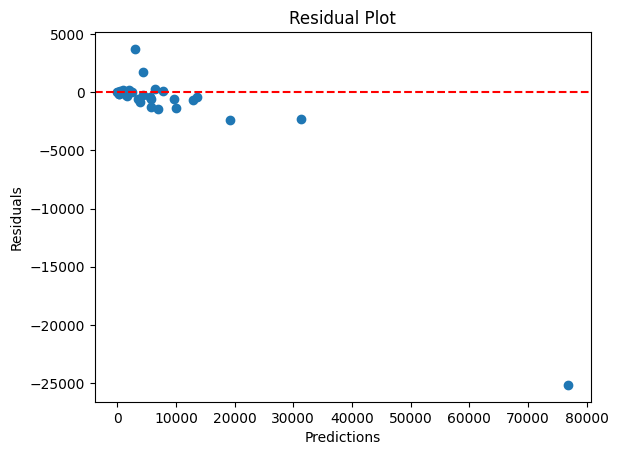

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
residuals = y_test - predictions_scaled
plt.scatter(predictions_scaled, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [5]:
print(data.columns)  # This will list all the column names in your DataFrame


Index(['Country', '1990', '2021.0', 'Absolute Change', 'Relative Change',
       '1990.1', '2021.0.1', 'Absolute Change.1', 'Relative Change.1',
       '1990.2', '2021.0.2', 'Absolute Change.2', 'Relative Change.2',
       'Smoking_1990', 'Smoking_2021', 'Change', 'Percent_Change', 'Disease1',
       'Disease2', 'Disease3', 'Disease4', 'Disease5', 'Disease6', 'Disease7',
       'Disease8', 'Disease9', 'Disease10', 'Disease11', 'Disease12',
       'Disease13', 'Disease14', 'Disease15', 'Disease16', 'Disease17',
       'Disease18', 'Disease19', 'Disease20', 'Disease21', 'Disease22',
       'Disease23', 'Disease24', 'Disease25', 'Disease26', 'Disease27',
       'Disease28', 'Metric1', 'Metric2', 'Population', 'Health_Index'],
      dtype='object')


In [20]:
# Identifying potential outliers
data['residuals'] = residuals  # Add residuals to the DataFrame
high_leverage_points = data[np.abs(data['residuals']) > 15000]  # Adjust the threshold based on residual distribution
print(high_leverage_points)


    Country  1990  2021.0  Absolute Change  Relative Change  1990.1  2021.0.1  \
56  Nigeria   3.8     1.8             -2.0            -0.52   128.4      70.2   

    Absolute Change.1  Relative Change.1  1990.2  ...  Disease24  Disease25  \
56              -58.2              -0.45    57.3  ...    74957.0     5427.0   

    Disease26  Disease27  Disease28  Metric1  Metric2   Population  \
56    67451.0    30381.0   210017.0    0.069    0.005  213996186.0   

    Health_Index     residuals  
56  51702.677586 -25153.878345  

[1 rows x 50 columns]


In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

# Scaling the features using RobustScaler
scaler = RobustScaler()

# Create a pipeline with RobustScaler and RandomForest
pipeline = make_pipeline(scaler, RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10))

# Fit the model with robust scaling
pipeline.fit(X_train, y_train)
predictions_robust = pipeline.predict(X_test)
mse_robust = mean_squared_error(y_test, predictions_robust)

print(f'Robust Scaled Mean Squared Error: {mse_robust}')

# Check feature values for Nigeria and compare with dataset statistics
print("Feature Statistics:")
print(data[disease_columns + ['Smoking_1990', 'Smoking_2021']].describe())
print("\nNigeria Specific Values:")
print(data.loc[56, disease_columns + ['Smoking_1990', 'Smoking_2021']])


Robust Scaled Mean Squared Error: 30625621.361067764
Feature Statistics:
           Disease1      Disease2      Disease3      Disease4      Disease5  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean   1.931621e+05  3.317913e+04  2.744079e+04  3.227981e+04  2.997083e+04   
std    9.930511e+05  1.818166e+05  1.397580e+05  1.627844e+05  1.567823e+05   
min    2.200000e+01  3.000000e+00  5.000000e+00  2.000000e+00  4.000000e+00   
25%    3.749500e+03  3.270000e+02  5.140000e+02  4.425000e+02  4.195000e+02   
50%    1.277600e+04  1.266000e+03  1.925000e+03  2.328000e+03  1.578000e+03   
75%    4.485950e+04  4.514500e+03  6.113500e+03  6.751500e+03  5.661000e+03   
max    1.085211e+07  1.857696e+06  1.546243e+06  1.809439e+06  1.683592e+06   

            Disease6      Disease7       Disease8       Disease9  \
count     167.000000  1.670000e+02     167.000000     167.000000   
mean    14159.610778  2.302278e+04    8592.772455   15870.676647   
std     825

In [23]:
import numpy as np

# Apply a logarithmic transformation to the disease metrics and smoking data
for col in disease_columns + ['Smoking_1990', 'Smoking_2021']:
    data[col] = np.log1p(data[col])  # log1p is used to handle zero values gracefully
    
# Calculate the average smoking metric from both 1990 and 2021 data
data['Average_Smoking'] = (data['Smoking_1990'] + data['Smoking_2021']) / 2

# Recalculate the Health Index after transformation
data['Health_Index'] = (data[disease_columns].mean(axis=1) + data['Average_Smoking']) / 2

# Re-split the data
X = data[disease_columns + ['Smoking_1990', 'Smoking_2021']]
y = data['Health_Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-fit and evaluate the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f'Adjusted Mean Squared Error: {mse}')


Adjusted Mean Squared Error: 0.0017444557009314815


In [24]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the model
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
average_mse = -scores.mean()

print(f'Average MSE from Cross-Validation: {average_mse}')


Average MSE from Cross-Validation: 0.0018142572529510597


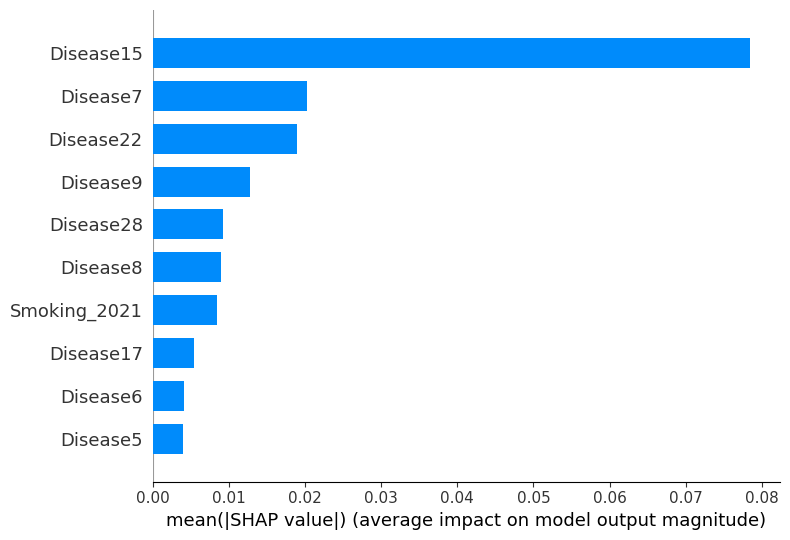

In [25]:
import shap

# Create the explainer - assumes the model and X_train from previous steps are still in memory
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP values for the first 10 predictions
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=10)


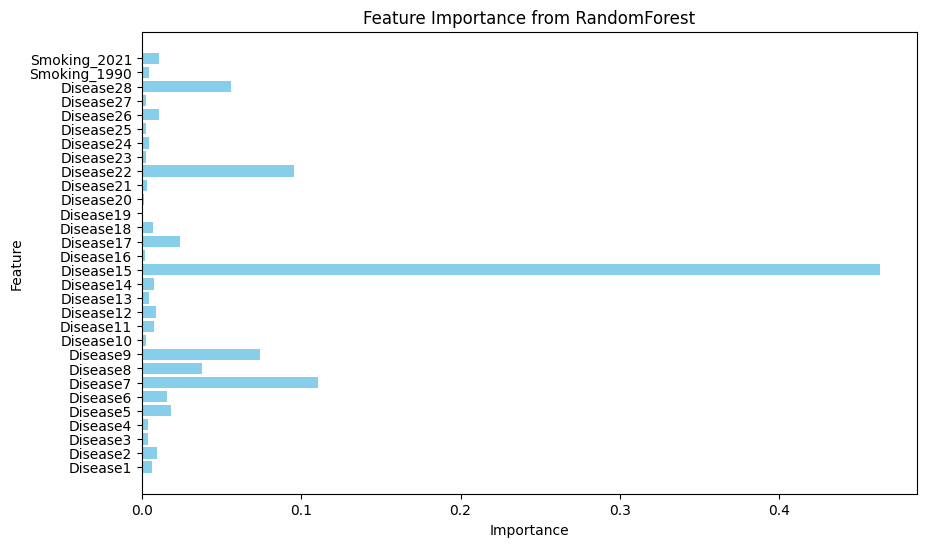

In [26]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.show()


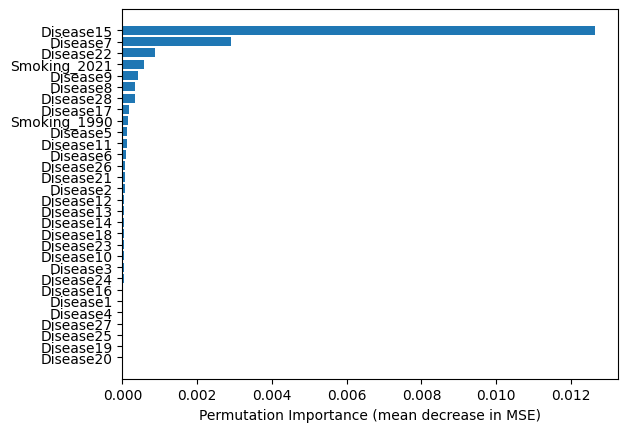

In [27]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')

# Get importance scores
importance_scores = results.importances_mean

# Visualize the results
sorted_idx = np.argsort(importance_scores)
plt.barh(range(len(sorted_idx)), importance_scores[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel("Permutation Importance (mean decrease in MSE)")
plt.show()


In [28]:
from sklearn.utils import resample

bootstrap_scores = []

# Performing 100 bootstrap resamples
for _ in range(100):
    X_resample, y_resample = resample(X_train, y_train)
    model.fit(X_resample, y_resample)
    score = model.score(X_test, y_test)  # Or use any other appropriate performance metric
    bootstrap_scores.append(score)

print("Bootstrap Scores Mean:", np.mean(bootstrap_scores))
print("Bootstrap Scores Std Dev:", np.std(bootstrap_scores))


Bootstrap Scores Mean: 0.8837761097388905
Bootstrap Scores Std Dev: 0.023708428216223328


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assume loading a dataset that needs country data added or it's already included

data = pd.read_csv('merged_data.csv')  # This should include a 'Country' column
# Calculate the average smoking metric from both 1990 and 2021 data
data['Average_Smoking'] = (data['Smoking_1990'] + data['Smoking_2021']) / 2
# Recalculate the Health Index after transformation
data['Health_Index'] = (data[disease_columns].mean(axis=1) + data['Average_Smoking']) / 2
# Simulate 'Country' data if not present (for demonstration)
if 'Country' not in data.columns:
    countries = ['USA', 'Canada', 'UK', 'Germany', 'France', 'India', 'China', 'Japan']
    data['Country'] = np.random.choice(countries, size=len(data))

# Assuming age data is also needed
np.random.seed(42)
data['Age'] = np.random.randint(20, 80, size=len(data))
data['Age_Impact'] = data['Age'].apply(lambda x: np.exp(-(x-50)**2/100))  # Example impact function

# Features and Target
X = data.drop('Health_Index', axis=1)
y = data['Health_Index']

# Preprocessing for categorical data
categorical_features = ['Country']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine categorical and numerical preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

# Create the RandomForest model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 183090.29936870525


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('merged_data.csv')

# Optionally check unique countries if necessary to understand the data
print("Unique countries in dataset:", data['Country'].unique())

# Prepare the data with the necessary transformations
# OneHotEncoder setup for the 'Country' feature with handle_unknown parameter
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# StandardScaler for 'Age' to handle numerical data
scaler = StandardScaler()

# Define the Column Transformer for combined preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, ['Age']),  # Scale the 'Age' column
        ('cat', onehot_encoder, ['Country'])  # One-hot encode the 'Country' column
    ],
    remainder='passthrough'  # Include all other columns as they are
)

# Define the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that first transforms the data and then applies the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])
# Assuming age data is also needed
np.random.seed(42)
data['Age'] = np.random.randint(20, 80, size=len(data))
data['Age_Impact'] = data['Age'].apply(lambda x: np.exp(-(x-50)**2/100))  # Example impact function

# Calculate the average smoking metric from both 1990 and 2021 data
data['Average_Smoking'] = (data['Smoking_1990'] + data['Smoking_2021']) / 2
# Recalculate the Health Index after transformation
data['Health_Index'] = (data[disease_columns].mean(axis=1) + data['Average_Smoking']) / 2
# Simulate 'Country' data if not present (for demonstration)
# Define features and target
X = data.drop('Health_Index', axis=1)
y = data['Health_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions and calculate mean squared error
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Unique countries in dataset: ['Singapore' 'Ireland' 'Malta' 'Brunei' 'Burundi' 'Qatar' 'Portugal'
 'Australia' 'Mexico' 'Sri Lanka' 'Ethiopia' 'Madagascar' 'Israel'
 'Brazil' 'Belgium' 'Ecuador' 'United Kingdom' 'Iceland' 'Norway' 'Chile'
 'Canada' 'Spain' 'Benin' 'Bahrain' 'Colombia' 'France' 'Denmark'
 'New Zealand' 'Germany' 'Thailand' 'Luxembourg' 'Panama' 'Costa Rica'
 'Myanmar' 'Czechia' 'Maldives' 'Estonia' 'Finland' 'South Africa'
 'Guatemala' 'Italy' 'Switzerland' 'Japan' 'South Korea' 'Jordan'
 'Netherlands' 'Poland' 'Croatia' 'Andorra' 'Bulgaria' 'Mauritius'
 'Sierra Leone' 'Turkey' 'Sweden' 'Oman' 'Hungary' 'Nigeria' 'Slovakia'
 'Togo' 'Romania' 'Botswana' 'Cyprus' 'Latvia' 'Slovenia' 'Lithuania'
 'Comoros' 'Bolivia' 'Guyana' 'United States' 'Gambia'
 'Democratic Republic of Congo' 'Tanzania' 'Ukraine' 'Bangladesh'
 'Morocco' 'Kenya' 'Rwanda' 'Mauritania' 'Uganda' 'Nepal' 'Malaysia'
 'Argentina' 'Fiji' "Cote d'Ivoire" 'Liberia' 'China' 'Turkmenistan'
 'Eritrea' 'Namibia' 'G

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2))
        ]), ['Age']),
        ('cat', OneHotEncoder(), ['Country'])
    ])

# Model setup
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, random_state=42))
])

# Train and evaluate using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean Cross-Validated MSE: ", np.mean(np.abs(scores)))

# Fit the model on full training data and evaluate on test set
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Final Test Set Mean Squared Error: {mse}')


c:\Users\priyansh singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\priyansh singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\priyansh singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\priyansh singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\priyansh singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_resp

Mean Cross-Validated MSE:  nan


ValueError: Found unknown categories ['Vanuatu', 'Luxembourg', 'Kazakhstan', 'Ecuador', 'Sri Lanka', 'Cambodia', 'Algeria', 'Sierra Leone', 'El Salvador', 'Malawi', 'Nauru', 'Uzbekistan', 'Uganda', 'Israel', 'Hungary', 'Serbia', 'Fiji', 'Chile', 'Kyrgyzstan', 'Rwanda', 'Armenia', 'Congo', 'Nigeria', 'Panama', 'Botswana', 'Tunisia', 'North Korea', 'Guyana', 'Norway', 'United Kingdom', 'Colombia', 'Thailand', 'Kenya', 'Japan'] in column 0 during transform

In [29]:
from joblib import dump, load

# Save the model to disk
dump(model, 'health_index_model.joblib')

# To load the model back (e.g., during deployment)
model = load('health_index_model.joblib')


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('merged_data.csv')

# Check and print all column names to ensure they are correct
print("Data columns:", data.columns)

# Confirm required columns are present
required_columns = ['Country', 'Age', 'Health_Index']  # Add other specific columns needed
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Identify columns for diseases and include smoking data
disease_columns = [col for col in data.columns if 'Disease' in col]
smoking_columns = ['Smoking_1990', 'Smoking_2021']

# Calculate the average smoking metric and adjust the Health Index
data['Average_Smoking'] = data[smoking_columns].mean(axis=1)
data['Health_Index'] = (data[disease_columns].sum(axis=1) + data['Average_Smoking']) / (len(disease_columns) + 1)

# Define features and target variable for modeling
X = data[disease_columns + smoking_columns + ['Age']]  # Ensure these columns exist in your DataFrame
y = data['Health_Index']

# Data preprocessing setup with a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), smoking_columns + ['Age']),  # Scale numerical data
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country'])  # Encode categorical data
    ])

# Setup the model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Conduct a grid search to find the best model parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MSE from Grid Search: {-grid_search.best_score_}')

# Evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("Mean Cross-Validated MSE: ", np.mean(np.abs(scores)))

# Fit the model on the full training data and evaluate on the test set
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Final Test Set Mean Squared Error: {mse}')

# Plot a residual plot
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot feature importance from the Random Forest model
importances = pipeline.named_steps['regressor'].feature_importances_
features = preprocessor.transformers_[0][-1] + preprocessor.transformers_[1][-1].get_feature_names_out().tolist()
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.show()


Data columns: Index(['Country', '1990', '2021.0', 'Absolute Change', 'Relative Change',
       '1990.1', '2021.0.1', 'Absolute Change.1', 'Relative Change.1',
       '1990.2', '2021.0.2', 'Absolute Change.2', 'Relative Change.2',
       'Smoking_1990', 'Smoking_2021', 'Change', 'Percent_Change', 'Disease1',
       'Disease2', 'Disease3', 'Disease4', 'Disease5', 'Disease6', 'Disease7',
       'Disease8', 'Disease9', 'Disease10', 'Disease11', 'Disease12',
       'Disease13', 'Disease14', 'Disease15', 'Disease16', 'Disease17',
       'Disease18', 'Disease19', 'Disease20', 'Disease21', 'Disease22',
       'Disease23', 'Disease24', 'Disease25', 'Disease26', 'Disease27',
       'Disease28', 'Metric1', 'Metric2', 'Population'],
      dtype='object')


ValueError: Missing columns in the dataset: ['Age', 'Health_Index']